In [89]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import re
from scipy.stats import pearsonr, spearmanr, linregress
import seaborn as sns


/var/folders/bx/pchp8hxx2k9gdgpwhgy8fpvc0000gn/T/ipykernel_47737/2457021436.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [90]:
# Frequency bands
BROADBAND = (0.0, 150.0)
DELTA = (0.0, 4.0)
THETA = (4.0, 8.0)
ALPHA = (8.0, 13.0)
BETA = (13.0, 30.0)
GAMMA = (30.0, 50.0)
HIGH_GAMMA = (50.0, 150.0)


bands = [BROADBAND, DELTA, THETA, ALPHA, BETA, GAMMA, HIGH_GAMMA]
bands_names = ["BROADBAND", "DELTA", "THETA", "ALPHA", "BETA", "GAMMA", "HIGH GAMMA"]

In [91]:
neurochemi_path = "new_Data/Schaefer2018_200Parcels_7Networks_Neuromaps.csv"
neurochemi_df = pd.read_csv(neurochemi_path)
neurochemi_df.index = neurochemi_df["region"] + "_" + neurochemi_df["Yeo"]

In [92]:
heritability_path = "Results_Log_Schaefer/ICC_and_Heritability/heritability_mean.csv"
heritability_df = pd.read_csv(heritability_path, index_col=0)

In [93]:
neurochemi_df.columns

Index(['ROINAME', 'lobe', 'region_1', 'hemi_1', 'Yeo', 'region', 'x.mni',
       'y.mni', 'z.mni', 'hemi', 'Yeo.1', 'myelinmap', 'thickness',
       'fcgradient01', 'fcgradient02', 'D1', 'D2', 'DAT', '5HT1a', '5HT1b',
       '5HT2a', '5HT4', '5HT6', '5HTT', 'a4b2', 'M1', 'VAChT', 'GABA', 'NMDA',
       'mGluR5', 'NET', 'H3', 'CB1', 'MOR'],
      dtype='object')

In [94]:
neurochemi_df.head()

,ROINAME,lobe,region_1,hemi_1,Yeo,region,x.mni,y.mni,z.mni,hemi,...,a4b2,M1,VAChT,GABA,NMDA,mGluR5,NET,H3,CB1,MOR
7Networks_LH_Cont_Cing_1_Control,Cont_Cing_1,LL,Cont_Cing_1 L,L,Control,7Networks_LH_Cont_Cing_1,-5,-29,28,left,...,8.454015,2.189424,-0.177502,478.77335,6.569975,-0.687886,-0.091334,11.972080,1.023214,12.171206
7Networks_RH_Cont_Cing_1_Control,Cont_Cing_1,RL,Cont_Cing_1 R,R,Control,7Networks_RH_Cont_Cing_1,5,-24,31,right,...,9.113444,2.136200,1.082502,381.10290,6.915021,-0.491032,-0.073453,12.879941,1.020884,16.401936
7Networks_LH_Cont_Cing_2_Control,Cont_Cing_2,LL,Cont_Cing_2 L,L,Control,7Networks_LH_Cont_Cing_2,-3,4,30,left,...,10.607389,3.260512,2.182581,59.99564,6.697426,0.010894,0.034804,20.353970,1.349875,26.360815
7Networks_RH_Cont_Cing_2_Control,Cont_Cing_2,RL,Cont_Cing_2 R,R,Control,7Networks_RH_Cont_Cing_2,5,3,30,right,...,10.238765,2.528997,1.905924,161.89583,6.515670,-0.225226,0.014422,17.306143,1.249088,24.537300
7Networks_LH_Cont_OFC_1_Control,Cont_OFC_1,LPF,Cont_OFC_1 L,L,Control,7Networks_LH_Cont_OFC_1,-32,42,-13,left,...,9.482768,2.747318,0.095222,511.10834,7.925510,-0.325040,-0.014478,15.763241,1.276795,29.844912


In [95]:
for i in range(len(heritability_df.index)):
    print(heritability_df.index[i], "---", neurochemi_df.index[i])

7Networks_LH_Cont_Cing_1_Control --- 7Networks_LH_Cont_Cing_1_Control
7Networks_RH_Cont_Cing_1_Control --- 7Networks_RH_Cont_Cing_1_Control
7Networks_LH_Cont_Cing_2_Control --- 7Networks_LH_Cont_Cing_2_Control
7Networks_RH_Cont_Cing_2_Control --- 7Networks_RH_Cont_Cing_2_Control
7Networks_LH_Cont_OFC_1_Control --- 7Networks_LH_Cont_OFC_1_Control
7Networks_LH_Cont_PFCl_1_Control --- 7Networks_LH_Cont_PFCl_1_Control
7Networks_RH_Cont_PFCl_1_Control --- 7Networks_RH_Cont_PFCl_1_Control
7Networks_LH_Cont_PFCl_2_Control --- 7Networks_LH_Cont_PFCl_2_Control
7Networks_RH_Cont_PFCl_2_Control --- 7Networks_RH_Cont_PFCl_2_Control
7Networks_LH_Cont_PFCl_3_Control --- 7Networks_LH_Cont_PFCl_3_Control
7Networks_RH_Cont_PFCl_3_Control --- 7Networks_RH_Cont_PFCl_3_Control
7Networks_LH_Cont_PFCl_4_Control --- 7Networks_LH_Cont_PFCl_4_Control
7Networks_RH_Cont_PFCl_4_Control --- 7Networks_RH_Cont_PFCl_4_Control
7Networks_LH_Cont_PFCl_5_Control --- 7Networks_LH_Cont_PFCl_5_Control
7Networks_RH_Cont_PFCl

In [96]:
nb_receptors = 19
receptors_columns = neurochemi_df.columns[-nb_receptors:]
receptors_df = neurochemi_df[receptors_columns]

functional_grad_columns = neurochemi_df.columns[-nb_receptors - 2: -nb_receptors]
functional_grad_df = neurochemi_df[functional_grad_columns]

In [97]:
receptors_df.head()

,D1,D2,DAT,5HT1a,5HT1b,5HT2a,5HT4,5HT6,5HTT,a4b2,M1,VAChT,GABA,NMDA,mGluR5,NET,H3,CB1,MOR
7Networks_LH_Cont_Cing_1_Control,14.006117,-1.993867,30.529467,20.731884,-1.456739,17.743000,0.592405,0.158384,1.989053,8.454015,2.189424,-0.177502,478.77335,6.569975,-0.687886,-0.091334,11.972080,1.023214,12.171206
7Networks_RH_Cont_Cing_1_Control,16.000734,-1.823936,30.669820,22.902142,-1.496138,21.164850,0.721436,0.111698,2.354141,9.113444,2.136200,1.082502,381.10290,6.915021,-0.491032,-0.073453,12.879941,1.020884,16.401936
7Networks_LH_Cont_Cing_2_Control,18.462404,-0.569109,31.412317,26.992490,-1.077878,6.253672,0.274784,0.247360,1.060925,10.607389,3.260512,2.182581,59.99564,6.697426,0.010894,0.034804,20.353970,1.349875,26.360815
7Networks_RH_Cont_Cing_2_Control,16.828459,-0.957557,31.450518,24.471682,-1.426145,14.773877,0.679842,0.157313,2.914252,10.238765,2.528997,1.905924,161.89583,6.515670,-0.225226,0.014422,17.306143,1.249088,24.537300
7Networks_LH_Cont_OFC_1_Control,16.233080,-0.172014,28.306690,32.771744,0.764095,47.320213,1.771301,0.440965,3.411031,9.482768,2.747318,0.095222,511.10834,7.925510,-0.325040,-0.014478,15.763241,1.276795,29.844912


In [98]:
functional_grad_df.head()

,fcgradient01,fcgradient02
7Networks_LH_Cont_Cing_1_Control,0.933865,-0.096429
7Networks_RH_Cont_Cing_1_Control,1.469619,-0.096109
7Networks_LH_Cont_Cing_2_Control,0.949497,0.011692
7Networks_RH_Cont_Cing_2_Control,0.917073,0.081667
7Networks_LH_Cont_OFC_1_Control,2.747506,0.037815


In [99]:
heritability_per_band = heritability_df.copy()

for i, band in enumerate(bands[1:]):
    columns_band_freq = [c for c in heritability_df.columns if float(c) >= band[0] and float(c) < band[1]]
    heritability_band_freq = heritability_df[columns_band_freq]
    avg_band_freq = heritability_band_freq.mean(axis=1)
    
    heritability_per_band[bands_names[i+1]] = avg_band_freq

heritability_per_band.drop(columns=heritability_df.columns, inplace=True)

heritability_per_band["BROADBAND"] = heritability_per_band.mean(axis=1)


In [100]:
heritability_per_band.iloc[20:30]

,DELTA,THETA,ALPHA,BETA,GAMMA,HIGH GAMMA,BROADBAND
ROI,,,,,,,
7Networks_LH_Cont_Par_1_Control,0.660261,0.549770,0.591893,0.487145,0.450794,-0.496757,0.373851
7Networks_RH_Cont_Par_1_Control,0.355946,0.462754,0.615129,0.936210,0.339773,0.579200,0.548169
7Networks_LH_Cont_Par_2_Control,0.637696,0.691541,0.695848,0.413309,0.727007,0.364785,0.588364
7Networks_RH_Cont_Par_2_Control,0.397294,0.596707,0.661090,0.908680,0.726291,0.655392,0.657576
7Networks_LH_Cont_Par_3_Control,0.803603,0.626187,0.735001,0.464995,0.661228,-0.774946,0.419345
7Networks_RH_Cont_Par_3_Control,0.598678,0.776136,0.755204,0.573063,0.552339,0.728389,0.663968
7Networks_LH_Cont_Temp_1_Control,0.714243,0.704392,0.991636,0.143461,0.341919,-0.062928,0.472120
7Networks_RH_Cont_Temp_1_Control,0.730207,0.920577,0.664541,0.418165,0.676682,0.304370,0.619091
7Networks_LH_Cont_pCun_1_Control,0.619793,0.621974,0.755856,0.614351,0.636688,0.017366,0.544338


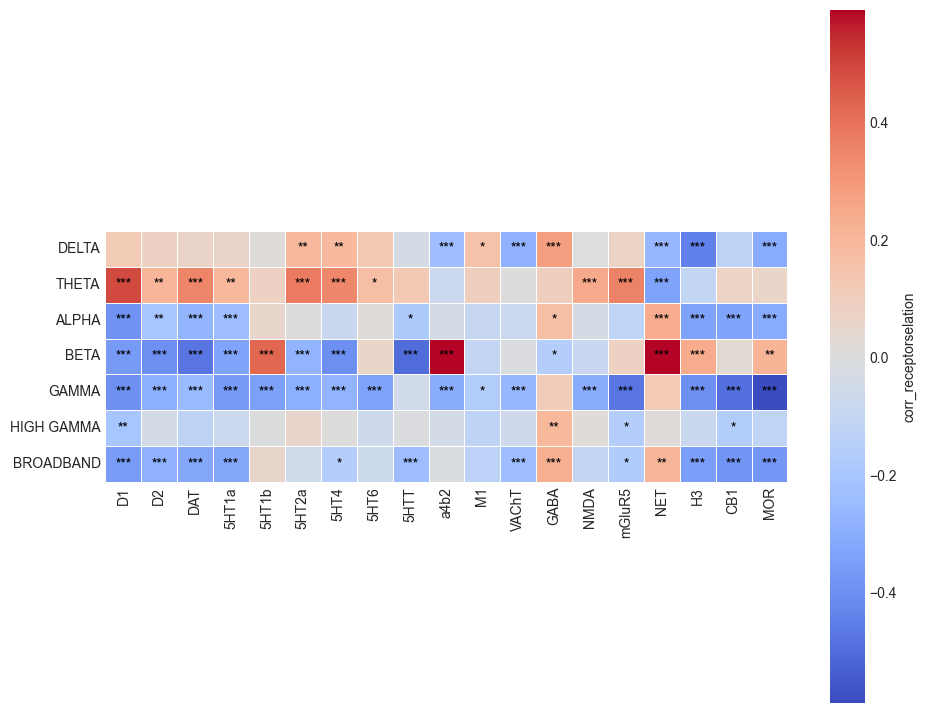

In [101]:
#Correlation between neurochemicals and heritability

corr_receptors = np.empty(shape=(heritability_per_band.shape[1], receptors_df.shape[1]))
p_values = corr_receptors.copy()
for i, freq in enumerate(heritability_per_band.columns):
    for j, ROI in enumerate(receptors_df.columns):
        corr_receptors[i, j], p_values[i, j] = pearsonr(heritability_per_band[freq], receptors_df[ROI])

corr_receptors = pd.DataFrame(corr_receptors, index=heritability_per_band.columns, columns=receptors_df.columns)

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr_receptors, cmap=cmap,
    square=True, linewidths=.7, cbar_kws={"shrink": 1.0, "label": "corr_receptorselation"}) 

# Add the p-values to the heatmap
for i in range(corr_receptors.shape[0]):
    for j in range(corr_receptors.shape[1]):
        if p_values[i, j] <0.001 :
            ax.text(j + 0.5, i + 0.5, f"***",
                ha='center', va='center', color='black', fontsize=10)
        elif p_values[i, j] <0.01 :
            ax.text(j + 0.5, i + 0.5, f"**",
                ha='center', va='center', color='black', fontsize=10)
        elif p_values[i, j] <0.05 :
            ax.text(j + 0.5, i + 0.5, f"*",
                ha='center', va='center', color='black', fontsize=10)

plt.savefig("Results_Log_Schaefer/Figures/Heatmap_Receptors_Freqband_Corr_Schaefer.pdf")        

In [102]:
corr_receptors

,D1,D2,DAT,5HT1a,5HT1b,5HT2a,5HT4,5HT6,5HTT,a4b2,M1,VAChT,GABA,NMDA,mGluR5,NET,H3,CB1,MOR
DELTA,0.121682,0.084334,0.066969,0.067829,0.011575,0.194910,0.189715,0.134561,-0.038506,-0.236206,0.160850,-0.285769,0.279251,-0.001009,0.074002,-0.255800,-0.441440,-0.122575,-0.309262
THETA,0.494358,0.206989,0.354553,0.197707,0.086519,0.379104,0.343212,0.175335,0.128892,-0.075383,0.102150,0.009534,0.101360,0.248670,0.357984,-0.334011,-0.104329,0.079427,0.062296
ALPHA,-0.390696,-0.204937,-0.273697,-0.236956,0.055261,0.009223,-0.079432,0.020104,-0.178800,-0.039987,-0.090191,-0.075800,0.175351,-0.033196,-0.115290,0.240925,-0.338156,-0.332415,-0.306810
BETA,-0.365151,-0.400585,-0.476419,-0.331551,0.427372,-0.278578,-0.401098,0.063485,-0.495290,0.589842,-0.103416,-0.007587,-0.155171,-0.084544,0.084178,0.591527,0.237716,0.033874,0.213955
GAMMA,-0.396866,-0.289166,-0.248259,-0.365693,-0.344653,-0.295891,-0.274813,-0.334099,-0.049437,-0.302379,-0.161388,-0.256534,0.113193,-0.301961,-0.473810,0.124537,-0.395406,-0.488497,-0.587134
HIGH GAMMA,-0.202937,-0.043610,-0.125746,-0.073817,-0.002501,0.057667,0.007023,-0.058776,-0.007444,-0.039268,-0.119347,-0.059946,0.195872,0.012092,-0.157894,0.020329,-0.078888,-0.160532,-0.114834
BROADBAND,-0.361083,-0.283049,-0.319637,-0.320100,0.055656,-0.055765,-0.154765,-0.064859,-0.241259,-0.011851,-0.128205,-0.233446,0.231691,-0.100890,-0.170613,0.207272,-0.348683,-0.380136,-0.373757


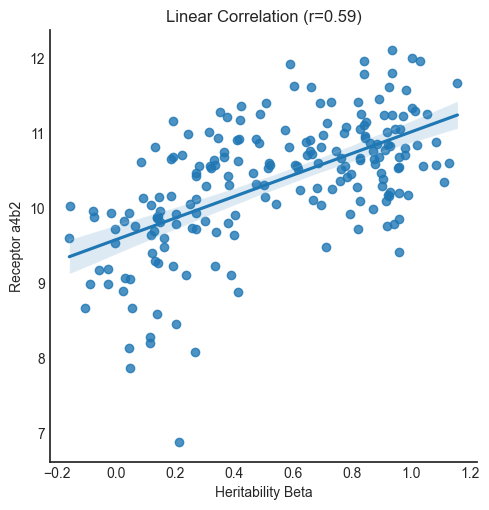

In [103]:
# Generate some example data
receptor_name = "a4b2"
x = heritability_per_band["BETA"]
y = receptors_df[receptor_name]

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create a DataFrame from the data
data = pd.DataFrame({'x': x, 'y': y})

# Create a scatter plot with a linear regression line
sns.set_style("white")
sns.lmplot(x='x', y='y', data=data)

# Add a title and labels to the plot
plt.title(f"Linear Correlation (r={corr_coef:.2f})")
plt.xlabel('Heritability Beta')
plt.ylabel('Receptor {}'.format(receptor_name))

# Show the plot
plt.show()

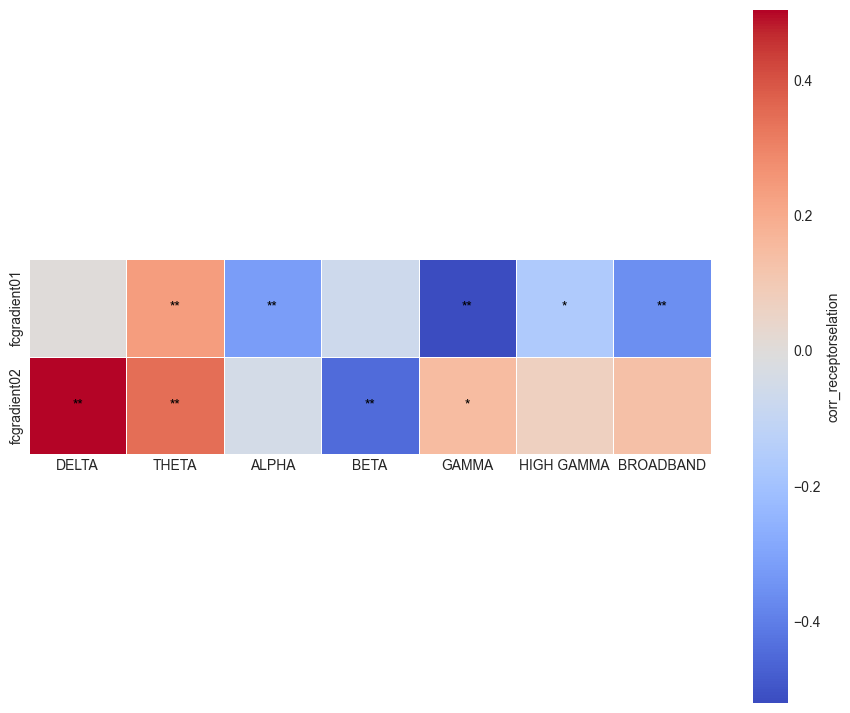

In [106]:
#Correlation between functional gradient and heritability

corr_funct_gradient = np.empty(shape=(heritability_per_band.shape[1], functional_grad_df.shape[1]))
p_values = np.empty(shape=(heritability_per_band.shape[1], functional_grad_df.shape[1]))

for i, freq in enumerate(heritability_per_band.columns):
    for j, ROI in enumerate(functional_grad_df.columns):
        corr_funct_gradient[i, j], p_values[i, j] = pearsonr(heritability_per_band[freq], functional_grad_df[ROI])

corr_funct_gradient = pd.DataFrame(corr_funct_gradient.T, columns=heritability_per_band.columns, index=functional_grad_df.columns)
p_values = p_values.T
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr_funct_gradient, cmap=cmap,
    square=True, linewidths=.7, cbar_kws={"shrink": 1.0, "label": "corr_receptorselation"}) 

# Add the p-values to the heatmap
for i in range(corr_funct_gradient.shape[0]):
    for j in range(corr_funct_gradient.shape[1]):
        if p_values[i, j] <0.01 :
            ax.text(j + 0.5, i + 0.5, f"**",
                ha='center', va='center', color='black', fontsize=10)
        elif p_values[i, j] <0.05 :
            ax.text(j + 0.5, i + 0.5, f"*",
                ha='center', va='center', color='black', fontsize=10)
            

plt.savefig("Results_Log_Schaefer/Figures/Heatmap_FuncGrad_Freqband_Corr_Schaefer.pdf")        

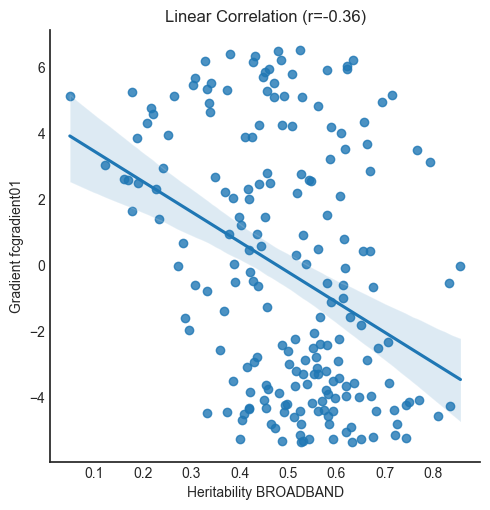

In [105]:
# Generate some example data
grad = "fcgradient01"
band = "BROADBAND"
x = heritability_per_band[band]
y = functional_grad_df[grad]

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create a DataFrame from the data
data = pd.DataFrame({'x': x, 'y': y})

# Create a scatter plot with a linear regression line
sns.lmplot(x='x', y='y', data=data)

# Add a title and labels to the plot
plt.title(f"Linear Correlation (r={corr_coef:.2f})")
plt.xlabel('Heritability {}'.format(band))
plt.ylabel('Gradient {}'.format(grad))

# Show the plot
plt.show()